# CSE527 Homework1
**Due date: 23:59 on Sep 24, 2019 (Tuesday)**

---
In this semester, we will use Google Colab for the assignments, which allows us to utilize resources that some of us might not have in their local machines such as GPUs. You will need to use your Stony Brook (*.stonybrook.edu) account for coding and Google Drive to save your results.

## Google Colab Tutorial
---
Go to https://colab.research.google.com/notebooks/, you will see a tutorial named "Welcome to Colaboratory" file, where you can learn the basics of using google colab.

Settings used for assignments: ***Edit -> Notebook Settings -> Runtime Type (Python 3)***.


## Local Machine Prerequisites
---
Since we are using Google Colab, all the code is run on the server environment where lots of libraries or packages have already been installed. In case of missing 
 libraries or if you want to install them in your local machine, below are the links for installation.
* **Install Python 3.6**: https://www.python.org/downloads/ or use Anaconda (a Python distribution) at https://docs.continuum.io/anaconda/install/. Below are some materials and tutorials which you may find useful for learning Python if you are new to Python.
  - https://docs.python.org/3.6/tutorial/index.html
  - https://www.learnpython.org/
  - http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_tutorials.html
  - http://www.scipy-lectures.org/advanced/image_processing/index.html


* **Install Python packages**: install Python packages: `numpy`, `matplotlib`, `opencv-python` using pip, for example:
```
pip install numpy matplotlib opencv-python
``` 
	Note that when using “pip install”, make sure that the version you are using is python3. Below are some commands to check which python version it uses in you machine. You can pick one to execute:
  
```  
    pip show pip

    pip --version

    pip -V

```

Incase of wrong version, use pip3 for python3 explictly.

* **Install Jupyter Notebook**: follow the instructions at http://jupyter.org/install.html to install Jupyter Notebook and familiarize yourself  with it. *After you have installed Python and Jupyter Notebook, please open the notebook file 'HW1.ipynb' with your Jupyter Notebook and do your homework there.*


## Example
---
Please read through the following examples where we apply image thresholding to an image. This example is desinged to help you get familiar with the basics of Python and routines of OpenCV. This part is for your exercises only, you do not need to submit anything from this part.

In [0]:
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage, misc
from IPython.display import display, Image
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


In [2]:
# Mount your google drive where you've saved your assignment folder
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
# Replace ------/-----/-----/' with the path such that "CSE527-HW1-Fall19" is your working directory
# cd '------/-----/-----/CSE527-HW1-Fall19/
# /content/gdrive/My Drive/CV/CSE527-HW1-Fall19
cd gdrive/My Drive/CV/Singh_Yasha_112970310_hw1


/content/gdrive/My Drive/CV/Singh_Yasha_112970310_hw1


In [0]:

# function for image thresholding
def imThreshold(img, threshold, maxVal):
    assert len(img.shape) == 2 # input image has to be gray
    
    height, width = img.shape
    bi_img = np.zeros((height, width), dtype=np.uint8)
    for x in range(height):
        for y in range(width):
            if img.item(x, y) > threshold:
                bi_img.itemset((x, y), maxVal)
                
    return bi_img

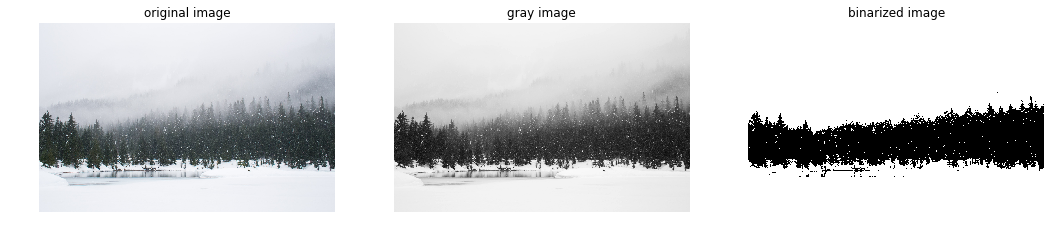

In [5]:
# read the image for local directory (same with this .ipynb) 
img = cv2.imread('SourceImages/Snow.jpg')

# convert a color image to gray
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# image thresholding using global tresholder
img_bi = imThreshold(img_gray, 127, 255)

# Be sure to convert the color space of the image from
# BGR (Opencv) to RGB (Matplotlib) before you show a 
# color image read from OpenCV
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('original image')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(img_gray, 'gray')
plt.title('gray image')
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(img_bi, 'gray')
plt.title('binarized image')
plt.axis("off")

plt.show()

## Description
---
There are five basic image processing problems in total with specific instructions for each of them. Be sure to read **Submission Guidelines** below. They are important.

## Problems
---

- **Problem 1.a Gaussian convolution {10 pts}:** Write a function in Python that takes two arguments, a width parameter and a variance parameter, and returns a 2D array containing a Gaussian kernel of the desired dimension and variance. The peak of the Gaussian should be in the center of the array. Make sure to normalize the kernel such that the sum of all the elements in the array is 1. Use this function and the OpenCV’s `filter2D` routine to convolve the image and noisy image arrays with a 5 by 5 Gaussian kernel with sigma of 1. Repeat with a 11 by 11 Gaussian kernel with a sigma of 3. There will be four output images from this problem, namely, image convolved with 3x3, 11x11, noisy image convolved with 3x3, and 11x11. Once you fill in and run the codes, the outputs will be saved under Results folder. These images will be graded based on the difference with ground truth images. You might want to try the same thing on other images but it is not required. Include your notebook and the saved state where the output is displayed in the notebook.

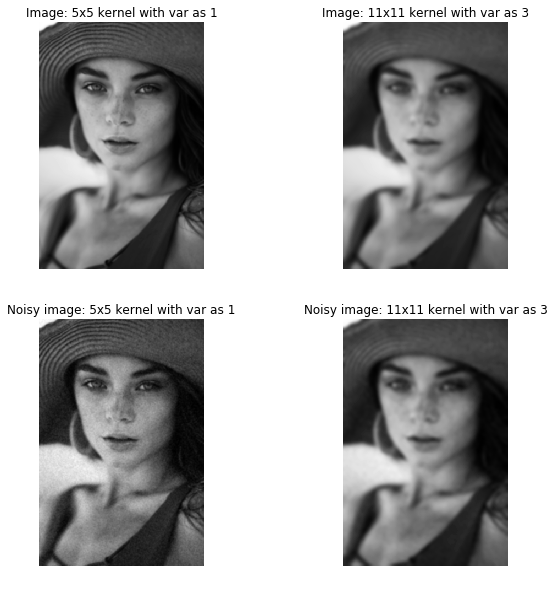

In [6]:
def genGaussianKernel(width, sigma):
    
    # define your 2d kernel here
    x1 = np.arange(-(width-1)//2, (width+1)//2)
    y1 = np.copy(x1)
    x2, y2 = np.meshgrid(x1,y1)
    kernel_2d = (np.exp(-(x2 ** 2 + y2 ** 2) / (2 * sigma ** 2))) / (2 * np.pi * sigma ** 2)
    summation = sum(sum(kernel_2d))
    kernel_2d = kernel_2d/summation

    return kernel_2d

# Load images
img       = cv2.imread('SourceImages/pic.jpg', 0)
img_noise = cv2.imread('SourceImages/pic_noisy.jpg', 0)

# Generate Gaussian kernels
kernel_1 =  genGaussianKernel(5,1) #Fill in your code here      # 5 by 5 kernel with sigma of 1
kernel_2 =  genGaussianKernel(11, 3) #Fill in your code here      # 11 by 11 kernel with sigma of 3

# Convolve with image and noisy image

res_img_kernel1 = cv2.filter2D(img, -1, kernel_1) #Fill in your code here
res_img_kernel2 = cv2.filter2D(img, -1, kernel_2) #Fill in your code here
res_img_noise_kernel1 = cv2.filter2D(img_noise, -1, kernel_1) #Fill in your code here
res_img_noise_kernel2 = cv2.filter2D(img_noise, -1, kernel_2) #Fill in your code here

# Write out result images
cv2.imwrite("Results/P1_01.jpg", res_img_kernel1)
cv2.imwrite("Results/P1_02.jpg", res_img_kernel2)
cv2.imwrite("Results/P1_03.jpg", res_img_noise_kernel1)
cv2.imwrite("Results/P1_04.jpg", res_img_noise_kernel2)

# Plot results
plt.figure(figsize = (10, 10))
plt.subplot(2, 2, 1)
plt.imshow(res_img_kernel1, 'gray')
plt.title('Image: 5x5 kernel with var as 1')
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(res_img_kernel2, 'gray')
plt.title('Image: 11x11 kernel with var as 3')
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(res_img_noise_kernel1, 'gray')
plt.title('Noisy image: 5x5 kernel with var as 1')
plt.axis("off")

plt.subplot(2, 2, 4)
plt.imshow(res_img_noise_kernel2, 'gray')
plt.title('Noisy image: 11x11 kernel with var as 3')
plt.axis("off")

plt.show()


- **Problem 1.b Median filter {15 pts}:** \\
(a)Write a function to generate an image with salt and pepper noise. The function takes two arguments, the input image and the probability that a pixel location has salt-pepper noise. A simple implementation can be to select pixel locations with probability 'p' where noise occurs and then with equal probability set the pixel value at those location to be 0 or 255.(**Hint: Use np.random.uniform()**) \\
(b)Write a function to implement a median filter. The function takes two arguments, an image and a window size(if window size is 'k', then a kxk window is used to determine the median pixel value at a location) and returns the output image. **Do not** use any inbuilt library (like scipy.ndimage_filter) to directly generate the result.  \\
For this question display the outputs for "probabilty of salt and pepper noise" argument in the **noisy_image_generator** function equal to 0.1 and 0.2, and median filter window size in **median_filter** function equal to 5x5. \\
(c) What is the Gaussian filter size (and sigma) that achieves a similar level of noise removal.


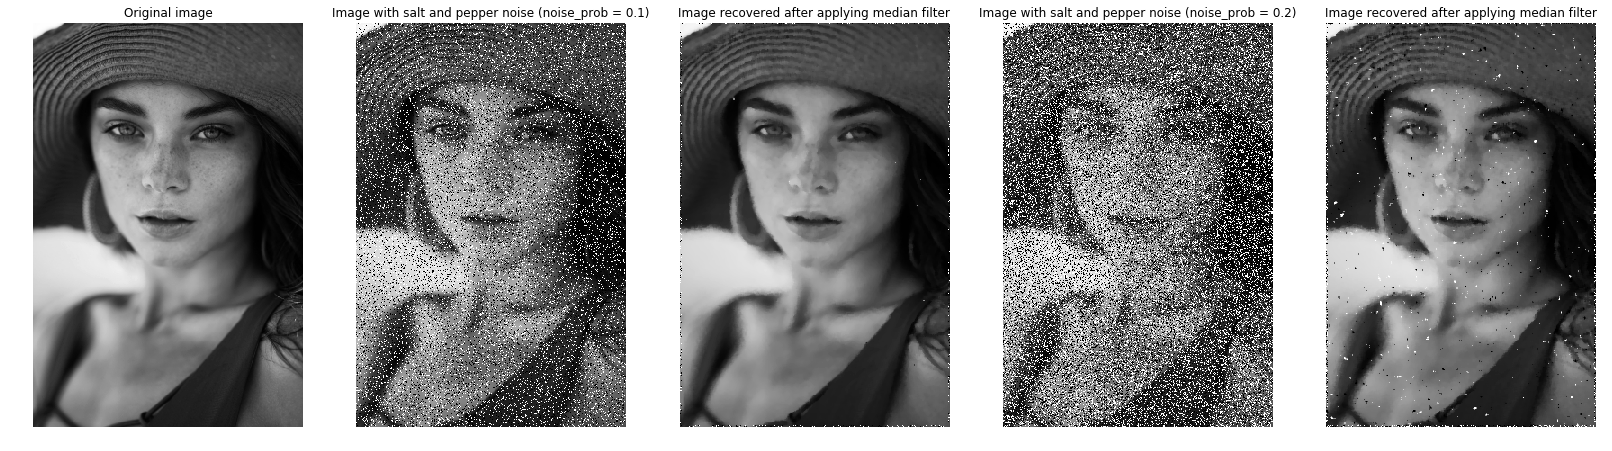

In [7]:
# Function to generate image with salt and pepper noise
def noisy_image_generator(img_in, probability = 0.1):
  # define your function here
  # Fill in your code here
  img_out = np.ones(img_in.shape)
  for row in range(img_in.shape[0]):
    for colm in range(img_in.shape[1]):
      val = np.random.uniform()
      if val < probability:
        img_out[row][colm] = 0
      elif val > 1-probability:
        img_out[row][colm] = 255
      else:
        img_out[row][colm] = img_in[row][colm]

  return img_out
  
# Function to apply median filter(window size kxk) on the input image  
def median_filter(img_in, window_size = 5):
  # define your function here
  # Fill in your code here
  border_size = window_size//2
  result = np.copy(img_in)
  for row in range(border_size, img_in.shape[0]-border_size):
    for colm in range(border_size, img_in.shape[1]-border_size):
      l = []
      for x in range(row-border_size, row+border_size):
        for y in range(colm-border_size, colm+border_size):
          l.append(img_in[x][y])
      result[row][colm] = np.median(l)
  return result
  
image_s_p1 = noisy_image_generator(img, probability = 0.1)  
result1 = median_filter(image_s_p1, window_size = 5)

image_s_p2 = noisy_image_generator(img, probability = 0.2)  
result2 = median_filter(image_s_p2, window_size = 5)

cv2.imwrite("Results/P1_05.jpg", result1)    
cv2.imwrite("Results/P1_06.jpg", result2)    

# Plot results
plt.figure(figsize = (28, 20))
plt.subplot(1, 5, 1)
plt.imshow(img, 'gray')
plt.title('Original image')
plt.axis("off")

plt.subplot(1, 5, 2)
plt.imshow(image_s_p1, 'gray')
plt.title('Image with salt and pepper noise (noise_prob = 0.1)')
plt.axis("off")

plt.subplot(1, 5, 3)
plt.imshow(result1, 'gray')
plt.title('Image recovered after applying median filter')
plt.axis("off")

plt.subplot(1, 5, 4)
plt.imshow(image_s_p2, 'gray')
plt.title('Image with salt and pepper noise (noise_prob = 0.2)')
plt.axis("off")

plt.subplot(1, 5, 5)
plt.imshow(result2, 'gray')
plt.title('Image recovered after applying median filter')
plt.axis("off")

plt.show()

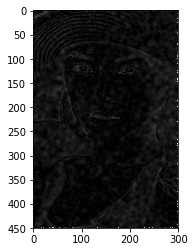

In [13]:
# Solution of Question 1.b.(c)

k1 = genGaussianKernel(11, 3)
gaussian_result1 = cv2.filter2D(image_s_p1, -1, k1)
image_difference1 = cv2.absdiff(gaussian_result1, result1)
plt.imshow(image_difference1)

gaussian_result2 = cv2.filter2D(image_s_p2, -1, k1)
image_difference2 = cv2.absdiff(gaussian_result2, result2)
# plt.imshow(image_difference2)

# EXPLANATION : A gaussain kernel with width = 11 and sigma = 3 produces similar level of noise removal as that of Median filter. 
# But the noise removal is upto a very small level of similarity
# i.e. Performance of Gaussian kernel on noisy image was not as good as that of Median filter. 



- **Problem 2 Separable convolutions {15 pts}:** The Gaussian kernel is separable, which means that convolution with a 2D Gaussian can be accomplished by convolving the image with two 1D Gaussians, one in the x direction and the other one in the y direction. Perform an 11x11 convolution with sigma = 3 from question 1 using this scheme. You can still use `filter2D` to convolve the images with each of the 1D kernels. Verify that you get the same results with what you did with 2D kernels by computing the difference image between the results from the two methods. This difference image should be close to black. Include your code and results in your colab Notebook file. There is no output image from this part. Be sure to display the result images in the notebook.

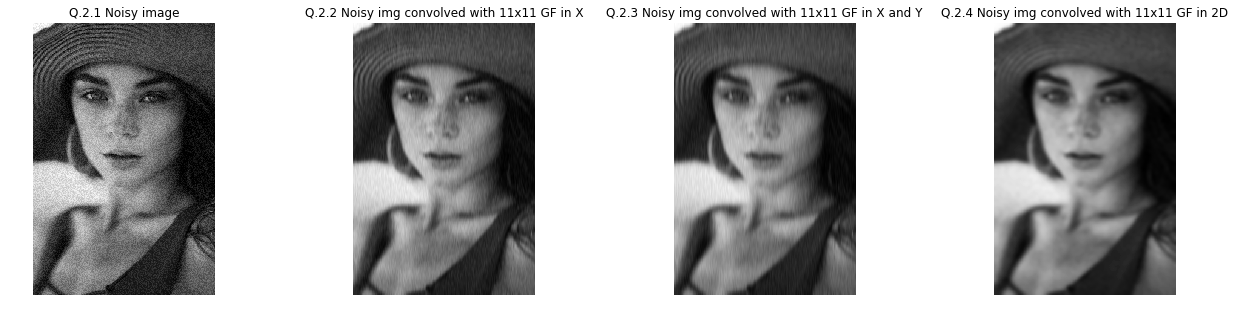

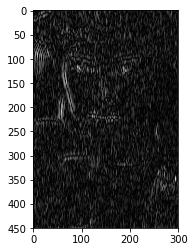

In [9]:
def genGausKernel1D(length, sigma):
    
    # define you 1d kernel here
    # Fill in your code here
    x = np.arange(-(length-1)//2, (length+1)//2)
    kernel_1d = 1 / (sigma * np.sqrt(2*np.pi)) * np.exp(-x**2/(2*sigma**2))
    summation = sum(kernel_1d)
    kernel_1d = kernel_1d/summation
    return kernel_1d

# Generate two 1d kernels here
width = 11
sigma = 3
kernel_x = genGausKernel1D(width, sigma)
kernel_y = np.vstack(kernel_x)

# Generate a 2d 11x11 kernel with sigma of 3 here as before
kernel_2d = genGaussianKernel(width, sigma) 

# Convolve with img_noise
res_img_noise_kernel1d_x  = cv2.filter2D(img_noise, -1, kernel_x)
res_img_noise_kernel1d_xy = cv2.filter2D(res_img_noise_kernel1d_x, -1, kernel_y)
res_img_noise_kernel2d    = cv2.filter2D(img_noise, -1, kernel_2d)

# Plot results
plt.figure(figsize=(22, 5))
plt.subplot(1, 4, 1)
plt.imshow(img_noise, 'gray')
plt.title('Q.2.1 Noisy image')
plt.axis("off")

plt.subplot(1, 4, 2)
plt.imshow(res_img_noise_kernel1d_x, 'gray')
plt.title('Q.2.2 Noisy img convolved with 11x11 GF in X')
plt.axis("off")

plt.subplot(1, 4, 3)
plt.imshow(res_img_noise_kernel1d_xy, 'gray')
plt.title('Q.2.3 Noisy img convolved with 11x11 GF in X and Y')
plt.axis("off")

plt.subplot(1, 4, 4)
plt.imshow(res_img_noise_kernel2d, 'gray')
plt.title('Q.2.4 Noisy img convolved with 11x11 GF in 2D')
plt.axis("off")

plt.show()

# Compute the difference array here
img_diff =  cv2.absdiff(res_img_noise_kernel2d, res_img_noise_kernel1d_xy)

plt.gray()
plt.imshow(img_diff)

- **Problem 3 Laplacian of Gaussian {20 pts}:** Convolve a 23 by 23 Gaussian of sigma = 3 with the discrete approximation to the Laplacian kernel [1 1 1; 1 -8 1; 1 1 1]. Plot the Gaussian kernel and 2D Laplacian of Gaussian using the `Matplotlib` function `plot`. Use the `Matplotlib` function `plot_surface` to generate a 3D plot of LoG. Do you see why this is referred to as the Mexican hat filter? Include your code and results in your Colab Notebook file. Apply the filter to the **four output images generated in the previous question**. Discuss the results in terms of edge accuracy and sensitivity to noise.

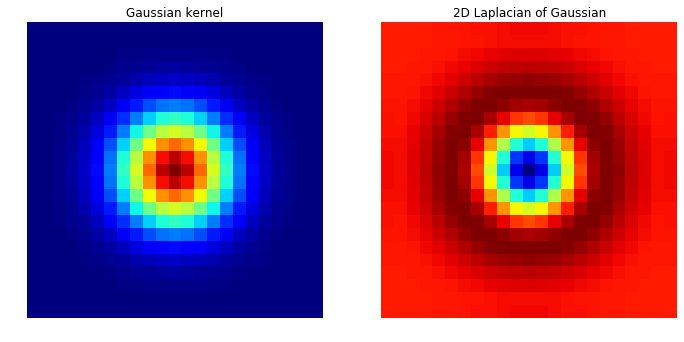

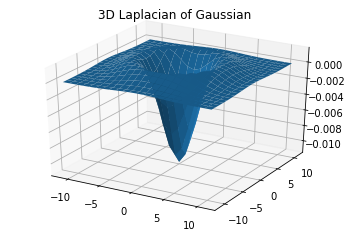

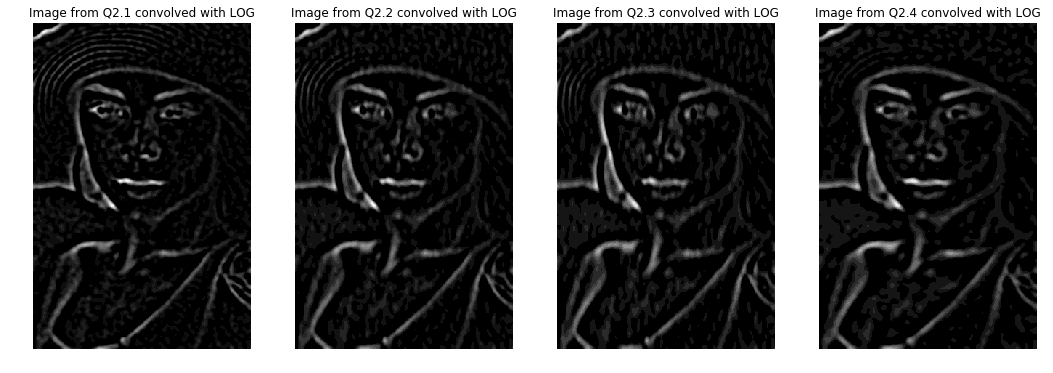

In [10]:
width = 23
sigma = 3

# Create your Laplacian kernel
Laplacian_kernel = np.array([[1,1,1], [1,-8,1], [1,1,1]])

# Create your Gaussian kernel
Gaussian_kernel = genGaussianKernel(23, 3)

# Create your Laplacian of Gaussian
# fill
LoG = cv2.filter2D(Gaussian_kernel, -1, Laplacian_kernel)

# Plot Gaussian and Laplacian
fig = plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.imshow(Gaussian_kernel, interpolation='none', cmap=cm.jet)
plt.title('Gaussian kernel')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(LoG, interpolation='none', cmap=cm.jet)
plt.title('2D Laplacian of Gaussian')
plt.axis("off")

# Plot the 3D figure of LoG
# Fill in your code here
fg = plt.figure()
axis = fg.add_subplot(111, projection='3d')
x1 = np.arange(-(width-1)//2, (width+1)//2)
x, y = np.meshgrid(x1, x1)
axis.plot_surface(x, y, LoG)


plt.title('3D Laplacian of Gaussian')
plt.show()

img_noise_LOG = cv2.filter2D(img_noise, -1, LoG)                # Fill in your code here
res_img_noise_kernel1d_x_LOG = cv2.filter2D(res_img_noise_kernel1d_x , -1, LoG) # Fill in your code here
res_img_noise_kernel1d_xy_LOG = cv2.filter2D(res_img_noise_kernel1d_xy, -1, LoG) # Fill in your code here
res_img_noise_kernel2d_LOG =  cv2.filter2D(res_img_noise_kernel2d, -1, LoG)  # Fill in your code here


# Plot results
plt.figure(figsize=(18, 6))
plt.subplot(1, 4, 1)
plt.imshow(img_noise_LOG, 'gray')
plt.title('Image from Q2.1 convolved with LOG')
plt.axis("off")

plt.subplot(1, 4, 2)
plt.imshow(res_img_noise_kernel1d_x_LOG, 'gray')
plt.title('Image from Q2.2 convolved with LOG')
plt.axis("off")

plt.subplot(1, 4, 3)
plt.imshow(res_img_noise_kernel1d_xy_LOG, 'gray')
plt.title('Image from Q2.3 convolved with LOG')
plt.axis("off")

plt.subplot(1, 4, 4)
plt.imshow(res_img_noise_kernel2d_LOG, 'gray')
plt.title('Image from Q2.4 convolved with LOG')
plt.axis("off")

plt.show()


- **Problem 4 Histogram equalization {20 pts}:** Refer to Szeliski's book on section 3.4.1, and within that section to eqn 3.9 for more information on histogram equalization. Getting the histogram of a grayscale image is incredibly easy with python. A histogram is a vector of numbers. Once you have the histogram, you can get the cumulative distribution function (CDF) from it. Then all you have left is to find the mapping from each value [0,255] to its adjusted value (just using the CDF basically). **DO NOT** use **cv2.equalizeHist()** directly to solve the exercise! We will expect to see in your code that you get the PDF and CDF, and that you manipulate the pixels directly (avoid a for loop, though). There will be one output image from this part which is the histogram equalized image. It will be compared against the ground truth.

True

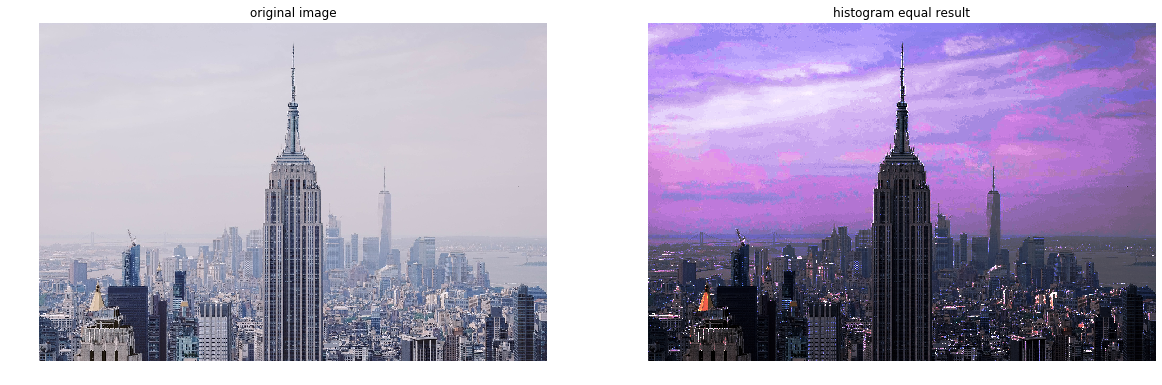

In [11]:
def histogram_equalization(img_in):

    # Write histogram equalization here
    # Fill in your code here
    pdf = np.histogram(img_in.flatten(), 256, [0,256])[0]
    cdf = pdf.cumsum()
    masked_cdf = np.ma.masked_equal(cdf,0)
    masked_cdf = (masked_cdf - masked_cdf.min())*255/(masked_cdf.max()-masked_cdf.min())
    cdf = np.ma.filled(masked_cdf,0).astype('uint8')
    img_out = cdf[img_in]
    return True, img_out

# Read in input images
img_equal = cv2.imread('SourceImages/hist_equal.jpg', cv2.IMREAD_COLOR)

# Histogram equalization
succeed, output_image = histogram_equalization(img_equal)

# Plot results
fig = plt.figure(figsize=(20, 15))
plt.subplot(1, 2, 1)
plt.imshow(img_equal[..., ::-1])
plt.title('original image')
plt.axis("off")


# Plot results
plt.subplot(1, 2, 2)
plt.imshow(output_image[..., ::-1])
plt.title('histogram equal result')
plt.axis("off")


# Write out results
cv2.imwrite("Results/P4_01.jpg", output_image)

- **Problem 5 Low and high pass filters {20 pts}:**  Start with the following tutorials: \\
http://docs.opencv.org/master/de/dbc/tutorial_py_fourier_transform.html
http://docs.opencv.org/2.4/doc/tutorials/core/discrete_fourier_transform/discrete_fourier_transform.html <br>
For your LPF (low pass filter), mask a 60x60 window of the center of the FT (Fourier Transform) image (the low frequencies). For the HPF, mask a 20x20 window excluding the center. The filtered low and high pass images will be the two outputs from this part and automatically saved to the Results folder.

True

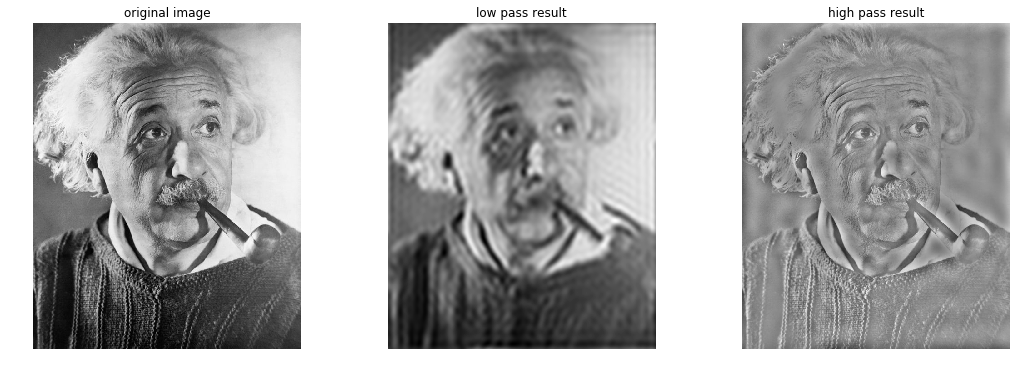

In [12]:
def low_pass_filter(img_in):

    # Write low pass filter here
    # Fill in your code here
    freq = np.fft.fft2(img_in)
    d_shift = np.fft.fftshift(freq)
    
    # mask
    # Fill in your code here
    r, c = img_in.shape
    cr, cc = r//2, c//2
    mask = np.zeros((r,c),np.uint8)
    mask[cr-30:cr+30, cc-30:cc+30] = 1
    
    # apply mask and inverse DFT
    # Fill in your code here
    f_shift = d_shift*mask
    f_ishift = np.fft.ifftshift(f_shift)
    img_out = np.fft.ifft2(f_ishift)
    img_out = np.real(img_out)
    
    return True, img_out


def high_pass_filter(img_in):

    # Write high pass filter here
    # Fill in your code here
    freq = np.fft.fft2(img_in)
    f_shift = np.fft.fftshift(freq)

    # mask
    # Fill in your code here
    r, c = img_in.shape
    cr, cc = r//2, c//2
    f_shift[cr-10:cr+11, cc-10:cc+11] = 0

    
    # apply mask and inverse DFT
    # Fill in your code here
    f_shifted = np.fft.ifftshift(f_shift)
    img_out = np.fft.ifft2(f_shifted)
    img_out = np.real(img_out)
    
    return True, img_out

# Read in input images
img_filter = cv2.imread('SourceImages/Einstein.jpg', 0)

# Low and high pass filter
succeed1, output_low_pass_image1  = low_pass_filter(img_filter)
succeed2, output_high_pass_image2 = high_pass_filter(img_filter)

# Plot results
fig = plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.imshow(img_filter, 'gray')
plt.title('original image')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(output_low_pass_image1, 'gray')
plt.title('low pass result')
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(output_high_pass_image2, 'gray')
plt.title('high pass result')
plt.axis("off")

# Write out results
cv2.imwrite("Results/P5_01.jpg", output_low_pass_image1)
cv2.imwrite("Results/P5_02.jpg", output_high_pass_image2)

## Submission guidelines
---
Please submit a pdf file that includes a ***google shared link***(explained in the next paragraph) through blackboard. This pdf file should be named as **Surname_Givenname_SBUID_hw*.pdf** (example: Jordan_Michael_111134567_hw1.pdf for this assignment).

To generate the ***google shared link***, first create a folder named ***Surname_Givenname_SBUID_hw*.*** (example: Jordan_Michael_111134567_hw1 for this assignment) in your Google Drive with your Stony Brook account. The structure of the files in the folder should be exactly the same as the one you downloaded. For instance in this homework:

```
Surname_Givenname_SBUID_hw1
        |---Results
        |---SourceImages
        |---[Your_code].ipynb
```
Note that this folder should be in your Google Drive with your Stony Brook account.

Then right click this folder, click ***Get shareable link***, in the People textfield, enter two TA's emails: ***bo.cao.1@stonybrook.edu*** and ***sayontan.ghosh@stonybrook.edu***. Make sure that TAs who have the link **can edit**, ***not just*** **can view**, and also **uncheck** the **Notify people** box.

Note that in google colab, we will only grade the version of the code right before the timestamp of the submission made in blackboard. 

Extract the downloaded .zip file to a folder of your preference. The input and output paths are predefined and **DO NOT** change them, (we assume that 'Surname_Givenname_SBUID_hw1' is your working directory, and all the paths are relative to this directory).  The image read and write functions are already written for you. All you need to do is to fill in the blanks as indicated to generate proper outputs.


-- DO NOT change the folder structure, please just fill in the blanks. <br>

You are encouraged to post and answer questions on Piazza. Based on the amount of email that we have received in past years, there might be dealys in replying to personal emails. Please ask questions on Piazza and send emails only for personal issues.

If you alter the folder structures, the grading of your homework will be significantly delayed and possibly penalized.

Be aware that your code will undergo plagiarism check both vertically and horizontally. Please do your own work.

Late submission penalty: <br>
There will be a 10% penalty per day for late submission. However, you will have 4 days throughout the whole semester to submit late without penalty. Note that the grace period is calculated by days instead of hours. If you submit the homework one minute after the deadline, one late day will be counted. Likewise, if you submit one minute after the deadline, the 10% penaly will be imposed if not using the grace period.
